Team Name : Team B
    
Domian Name : Health Care(Cancer – Facts and Figures)
    
Team members:

    1.Apoorva H M
    2.Nayana R
    3.Vishal Upadhyay
    4.Anurag Vishwakarma
    
Dataset Source: Kaggle – Centers for Disease Control and Prevention, State Cancer Profiles and United States Census Bureau

Dimensions:

    Cancer: (64, 3)
    Cancer Occurrence: (9919, 4)
    State: (51, 4)
    Year wise Cancer Death-rate: (27456, 9)
    
Data Description of all the attributes:

    1.Cancer:
        ID – Cancer Id,
        Name – Organ which is affected,
        Category – Department in which Names belongs to.
        
    2.Cancer Occurrence: 
        Cancer ID – Id of Cancer,
        State_name – States of US,
        Race_name – Sociology,
        Count – Number of people affected.
        
    3.State:
        Name – States of US,
        Percentage population below poverty – Percentage of people below poverty from each state of US,
        Percentage population insured – Pencentage of people who have health Insurance,
        Population – Total population of each state.
        
    4.Year wise Cancer Death-rate:
        Year – Represents the year,
        State - States of US,
		Locality – Represents Metropolitan and Non-Metropolitan,
		Observed Deaths – Total number of deaths each year, Each state,
		Population – Population of each state,
		Expected Deaths – Deaths that were expected to Happen,
		Potentially Excess Deaths – Number of deaths surpass the number of expected deaths,
		Percentage Potential Excess Deaths – Percentage of Potential excess deaths.

List of Problem Statements:

1.  Comparative study of highest count of people affected in each Category, Race wise and State wise.
2.	Which type of cancer is a menace for the people in the US?
3.	Whether Asian people or other sociology is mostly affected by which type of Cancer?
4.	Does Race has an influence on Cancer? If yes, which Race?
5.	Does State has an influence on Cancer? If yes, which State?
6.	Which States are highly affected by Cancer every year?	
7.	Correlation between Poverty Levels, Insurance Levels, and Cancer Incidence Levels.
8.	Is Metropolitan City or Non-metropolitan City more affected by Cancer (based on year wise death rate).


In [1]:
import pandas as pd
import numpy as np
import os
path = 'D:\Term 1\EDA\Team B Assignment 3'
os.chdir(path)

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,6)

In [3]:
cancer = pd.read_csv("Cancer.csv")
no_cancer = pd.read_csv("Cancer_Occurrence.csv")
state = pd.read_csv("State.csv")
year_death = pd.read_csv("Year wise Cancer Death-Rates.csv")

## PS-1 Comparative study of highest count of people affected in each Category, Race wise and State wise.

In [5]:
q1 = pd.merge(cancer,no_cancer,left_on='Id',right_on='Cancer_id',how = 'inner')
q1.head()

,Id,Name,Category,Cancer_id,State_name,Race_name,Count
0,20010,Lip,Oral Cavity and Pharynx,20010,Alabama,American Indian or Alaska Native,0
1,20010,Lip,Oral Cavity and Pharynx,20010,Alabama,Asian or Pacific Islander,0
2,20010,Lip,Oral Cavity and Pharynx,20010,Alabama,White,55
3,20010,Lip,Oral Cavity and Pharynx,20010,Alabama,Other Races and Unknown combined,0
4,20010,Lip,Oral Cavity and Pharynx,20010,Alaska,American Indian or Alaska Native,0


In [9]:
# Grouping state name, category, name of cancer

q1i = q1.groupby(['State_name','Category','Name'])['Count'].sum().reset_index()
q1i.head()

,State_name,Category,Name,Count
0,Alabama,Bones and Joints,Bones and Joints,31
1,Alabama,Brain and Other Nervous System,Brain,319
2,Alabama,Brain and Other Nervous System,Cranial Nerves Other Nervous System,0
3,Alabama,Digestive System,"Anus, Anal Canal and Anorectum",103
4,Alabama,Digestive System,Colon and Rectum,2487


In [11]:
# Sorting no of people suffering count in each state

q1iii = q1i.sort_values(by='Count',ascending=False)
q1iii.head()

,State_name,Category,Name,Count
292,California,Male and Female Breast,Female Breast,26737
290,California,Male Genital System,Prostate,17663
308,California,Respiratory System,Lung and Bronchus,16948
2084,New York,Male and Female Breast,Female Breast,16336
628,Florida,Respiratory System,Lung and Bronchus,16225


In [12]:
# Grouping race name, category, name of cancer

q1ii = q1.groupby(['Race_name','Category','Name'])['Count'].sum().reset_index()
q1ii.head()

,Race_name,Category,Name,Count
0,American Indian or Alaska Native,Bones and Joints,Bones and Joints,0
1,American Indian or Alaska Native,Brain and Other Nervous System,Brain,20
2,American Indian or Alaska Native,Brain and Other Nervous System,Cranial Nerves Other Nervous System,0
3,American Indian or Alaska Native,Digestive System,"Anus, Anal Canal and Anorectum",0
4,American Indian or Alaska Native,Digestive System,Colon and Rectum,817


In [13]:
# Sorting no of people suffering count in each race people

q1iv = q1ii.sort_values(by='Count',ascending=False)
q1iv.head()

,Race_name,Category,Name,Count
293,White,Male and Female Breast,Female Breast,199594
309,White,Respiratory System,Lung and Bronchus,187086
291,White,Male Genital System,Prostate,141236
260,White,Digestive System,Colon and Rectum,114912
313,White,Skin excluding Basal and Squamous,Melanoma of the Skin,75199


In [14]:
#Plotting bar chart from state wise and race wise, no of cancer partient count

from ipywidgets import widgets, interact, Layout, Button, Box

from IPython.display import display

name_cancer = widgets.Dropdown(options = ['All'] + list(q1iv['Name'].unique()),
                      value = 'All',
                      description = "name_cancer: "
)

def f(x):
    
    if name_cancer.value != "All":
        df2 = q1iv[q1iv.Name == name_cancer.value]
    else:
        df2 = q1iv
    
    plt.rcParams['figure.figsize'] = [15,5]
    
    plt.bar(df2['Race_name'], df2['Count'], width = .4)
    
    plt.xlabel("Race Name")
    
    plt.ylabel('No. of Cases')
    
    plt.title("Race wise")
    
    plt.show()

interact(f, x = name_cancer)

interactive(children=(Dropdown(description='name_cancer: ', options=('All', 'Female Breast', 'Lung and Bronchu…

<function __main__.f(x)>

In [17]:
name_cancer = widgets.Dropdown(options = ['All'] + list(q1iii['Name'].unique()),
                      value = 'All',
                      description = "name_cancer: "
)

def f(x):
    
    if name_cancer.value != "All":
        df2 = q1iii[q1iii.Name == name_cancer.value]
    else:
        df2 = q1iii
    
    plt.rcParams['figure.figsize'] = (5,15)
    
    plt.barh(df2['State_name'], df2['Count'], height = 0.5)
    
    plt.xlabel("State Name")
    
    plt.ylabel('No. of Cases')
    
    plt.title("State wise")
    
    plt.show()
    
interact(f, x = name_cancer)

interactive(children=(Dropdown(description='name_cancer: ', options=('All', 'Female Breast', 'Prostate', 'Lung…

<function __main__.f(x)>

## -------------------------------------- PS1 END ------------------------------------------------------------------------

## PS-2 Which type of cancer is a menace for the people in the US?

In [18]:
# Merge no_cancer and cancer table

q2 = pd.merge(no_cancer,cancer,left_on='Cancer_id',right_on='Id',how= 'inner')
q2.head()

,Cancer_id,State_name,Race_name,Count,Id,Name,Category
0,20010,Alabama,American Indian or Alaska Native,0,20010,Lip,Oral Cavity and Pharynx
1,20010,Alabama,Asian or Pacific Islander,0,20010,Lip,Oral Cavity and Pharynx
2,20010,Alabama,White,55,20010,Lip,Oral Cavity and Pharynx
3,20010,Alabama,Other Races and Unknown combined,0,20010,Lip,Oral Cavity and Pharynx
4,20010,Alaska,American Indian or Alaska Native,0,20010,Lip,Oral Cavity and Pharynx


In [19]:
# Grouping based on category , name of cancer type

q2 = q2[['Cancer_id','Category','Name','Count']]
q2 = q2.groupby(['Category','Name'])['Count'].sum().reset_index()
q2.head()

,Category,Name,Count
0,Bones and Joints,Bones and Joints,2651
1,Brain and Other Nervous System,Brain,20540
2,Brain and Other Nervous System,Cranial Nerves Other Nervous System,932
3,Digestive System,"Anus, Anal Canal and Anorectum",6778
4,Digestive System,Colon and Rectum,140267


In [20]:
# Sorting the values

q2 = q2.sort_values(by='Count',ascending=True)
q2.head()

,Category,Name,Count
55,Respiratory System,Pleura,0
33,Male Genital System,Other Male Genital Organs,76
56,Respiratory System,"Trachea, Mediastinum and Other Respiratory Organs",244
25,Kaposi Sarcoma,Kaposi Sarcoma,691
23,Female Genital System,Vagina,844


<BarContainer object of 64 artists>

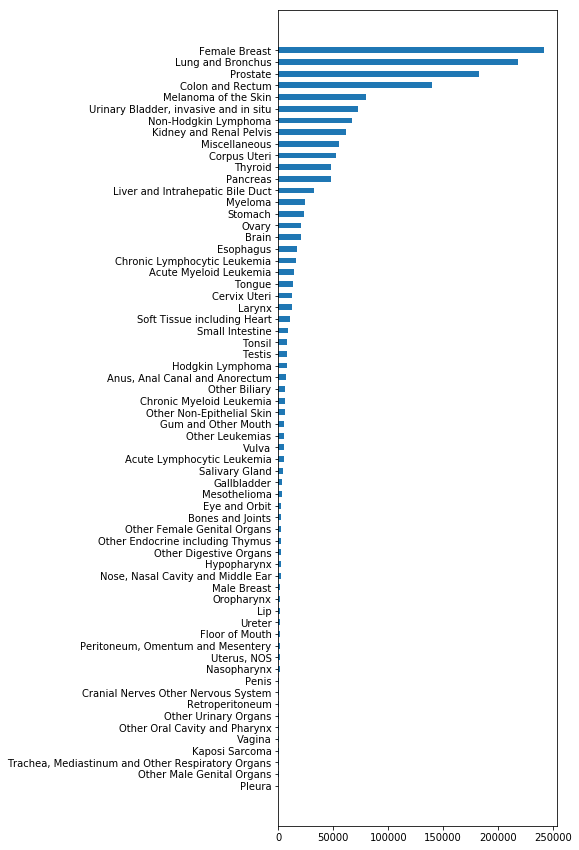

In [21]:
plt.rcParams['figure.figsize'] = (5,15)
plt.barh(q2['Name'], q2['Count'], height = 0.5)

## ------------------------------------------ PS2 END -----------------------------------------------------------------

## PS-3 Whether Asian people or other sociology is mostly affected by which type of Cancer?

In [22]:
# Filtering  
q3 = no_cancer[(no_cancer['Race_name'] == 'Asian or Pacific Islander')]
q3.head()

,Cancer_id,State_name,Race_name,Count
1,20010,Alabama,Asian or Pacific Islander,0
5,20010,Alaska,Asian or Pacific Islander,0
8,20010,Arizona,Asian or Pacific Islander,0
12,20010,Arkansas,Asian or Pacific Islander,0
18,20010,Colorado,Asian or Pacific Islander,0


In [23]:
q3i = pd.merge(q3,cancer,left_on='Cancer_id',right_on='Id',how= 'inner')
q3i.head()

,Cancer_id,State_name,Race_name,Count,Id,Name,Category
0,20010,Alabama,Asian or Pacific Islander,0,20010,Lip,Oral Cavity and Pharynx
1,20010,Alaska,Asian or Pacific Islander,0,20010,Lip,Oral Cavity and Pharynx
2,20010,Arizona,Asian or Pacific Islander,0,20010,Lip,Oral Cavity and Pharynx
3,20010,Arkansas,Asian or Pacific Islander,0,20010,Lip,Oral Cavity and Pharynx
4,20010,Colorado,Asian or Pacific Islander,0,20010,Lip,Oral Cavity and Pharynx


In [24]:
q3ii = q3i.groupby(['Race_name','Category','Name'])['Count'].sum().reset_index()
q3ii.head()

,Race_name,Category,Name,Count
0,Asian or Pacific Islander,Bones and Joints,Bones and Joints,44
1,Asian or Pacific Islander,Brain and Other Nervous System,Brain,453
2,Asian or Pacific Islander,Brain and Other Nervous System,Cranial Nerves Other Nervous System,0
3,Asian or Pacific Islander,Digestive System,"Anus, Anal Canal and Anorectum",28
4,Asian or Pacific Islander,Digestive System,Colon and Rectum,5256


In [25]:
q3iii = q3ii.sort_values(by = 'Count', ascending=True)
q3iii.head()

,Race_name,Category,Name,Count
17,Asian or Pacific Islander,Eye and Orbit,Eye and Orbit,0
39,Asian or Pacific Islander,Mesothelioma,Mesothelioma,0
25,Asian or Pacific Islander,Kaposi Sarcoma,Kaposi Sarcoma,0
42,Asian or Pacific Islander,Oral Cavity and Pharynx,Floor of Mouth,0
44,Asian or Pacific Islander,Oral Cavity and Pharynx,Hypopharynx,0


In [26]:
q3iv = no_cancer[(no_cancer['Race_name'] != 'Asian or Pacific Islander')]
q3iv.head()

,Cancer_id,State_name,Race_name,Count
0,20010,Alabama,American Indian or Alaska Native,0
2,20010,Alabama,White,55
3,20010,Alabama,Other Races and Unknown combined,0
4,20010,Alaska,American Indian or Alaska Native,0
6,20010,Alaska,Black or African American,0


In [27]:
q3v = pd.merge(q3iv,cancer,left_on='Cancer_id',right_on='Id',how= 'inner')
q3v.head()

,Cancer_id,State_name,Race_name,Count,Id,Name,Category
0,20010,Alabama,American Indian or Alaska Native,0,20010,Lip,Oral Cavity and Pharynx
1,20010,Alabama,White,55,20010,Lip,Oral Cavity and Pharynx
2,20010,Alabama,Other Races and Unknown combined,0,20010,Lip,Oral Cavity and Pharynx
3,20010,Alaska,American Indian or Alaska Native,0,20010,Lip,Oral Cavity and Pharynx
4,20010,Alaska,Black or African American,0,20010,Lip,Oral Cavity and Pharynx


In [28]:
q3vi = q3v.groupby(['Race_name','Category','Name'])['Count'].sum().reset_index()
q3vi.head()

,Race_name,Category,Name,Count
0,American Indian or Alaska Native,Bones and Joints,Bones and Joints,0
1,American Indian or Alaska Native,Brain and Other Nervous System,Brain,20
2,American Indian or Alaska Native,Brain and Other Nervous System,Cranial Nerves Other Nervous System,0
3,American Indian or Alaska Native,Digestive System,"Anus, Anal Canal and Anorectum",0
4,American Indian or Alaska Native,Digestive System,Colon and Rectum,817


In [29]:
q3vii = q3vi.sort_values(by = 'Count', ascending=False)
q3vii.head()

,Race_name,Category,Name,Count
229,White,Male and Female Breast,Female Breast,199594
245,White,Respiratory System,Lung and Bronchus,187086
227,White,Male Genital System,Prostate,141236
196,White,Digestive System,Colon and Rectum,114912
249,White,Skin excluding Basal and Squamous,Melanoma of the Skin,75199


In [30]:
name_cancer = widgets.Dropdown(options = ['All'] + list(q3vii['Name'].unique()),
                      value = 'All',
                      description = "name_cancer: "
)

def f(x):
    
    if name_cancer.value != "All":
        df2 = q3vii[q3vii.Name == name_cancer.value]
    else:
        df2 = q3vii
    
    plt.rcParams['figure.figsize'] = [15,5]
    
    plt.bar(df2['Race_name'], df2['Count'], width = .4)
    
    plt.xlabel("Race Name")
    
    plt.ylabel('No. of Cases')
    
    plt.title("Race wise")
    
    plt.show()

interact(f, x = name_cancer)

interactive(children=(Dropdown(description='name_cancer: ', options=('All', 'Female Breast', 'Lung and Bronchu…

<function __main__.f(x)>

<BarContainer object of 64 artists>

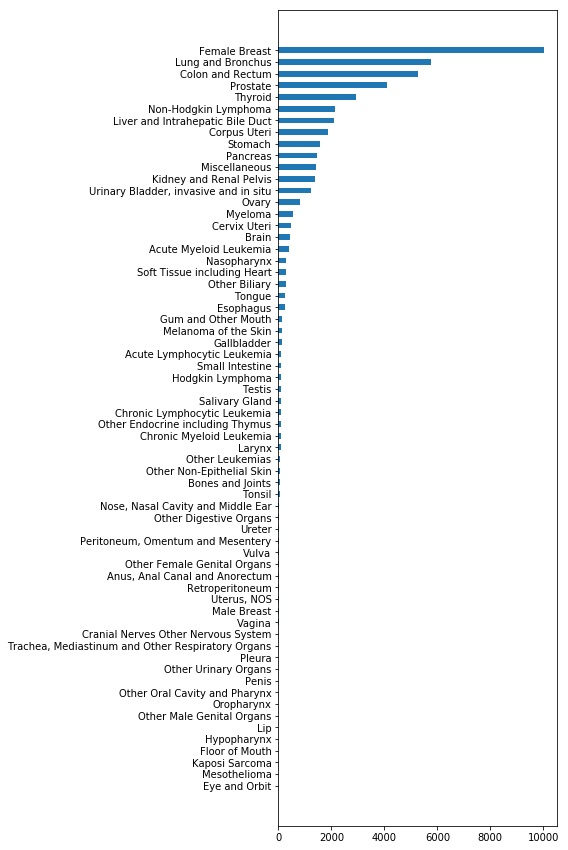

In [31]:
plt.rcParams['figure.figsize'] = (5,15)
plt.barh(q3iii['Name'], q3iii['Count'], height = 0.5)

## ----------------------------------------- PS3 END -------------------------------------------------------------------

## PS-4 Does Race has an influence on Cancer? If yes, which Race?

In [32]:
# Grouping based on Race_name

q4 = no_cancer.groupby('Race_name')['Count'].count().reset_index()
q4.head()

,Race_name,Count
0,American Indian or Alaska Native,2001
1,Asian or Pacific Islander,1758
2,Black or African American,1834
3,Other Races and Unknown combined,1759
4,White,2567


In [33]:
# Sorting the values

q4i = q4.sort_values(by='Count',ascending=False)
q4i.head()

,Race_name,Count
4,White,2567
0,American Indian or Alaska Native,2001
2,Black or African American,1834
3,Other Races and Unknown combined,1759
1,Asian or Pacific Islander,1758


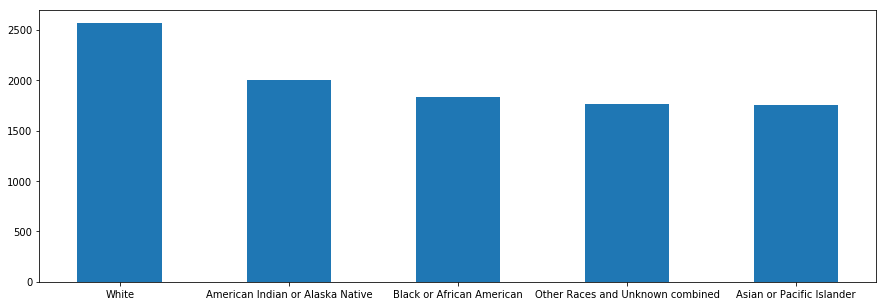

In [34]:
# Plotting of bar chart

plt.rcParams['figure.figsize'] = (15,5)
plt.bar(q4i['Race_name'],q4i['Count'],width=0.5)
plt.show()

## ------------------------------------- PS4 END -------------------------------------------------------------

## PS-5 Does State has an influence on Cancer? If yes, which State?

In [35]:
# Merging no_cancer and cancer

q5 = pd.merge(no_cancer,cancer,left_on='Cancer_id',right_on='Id',how= 'inner')
q5.head()

,Cancer_id,State_name,Race_name,Count,Id,Name,Category
0,20010,Alabama,American Indian or Alaska Native,0,20010,Lip,Oral Cavity and Pharynx
1,20010,Alabama,Asian or Pacific Islander,0,20010,Lip,Oral Cavity and Pharynx
2,20010,Alabama,White,55,20010,Lip,Oral Cavity and Pharynx
3,20010,Alabama,Other Races and Unknown combined,0,20010,Lip,Oral Cavity and Pharynx
4,20010,Alaska,American Indian or Alaska Native,0,20010,Lip,Oral Cavity and Pharynx


In [36]:
q5i = q5[['Cancer_id','State_name','Category','Name','Count']]
q5i.head()

,Cancer_id,State_name,Category,Name,Count
0,20010,Alabama,Oral Cavity and Pharynx,Lip,0
1,20010,Alabama,Oral Cavity and Pharynx,Lip,0
2,20010,Alabama,Oral Cavity and Pharynx,Lip,55
3,20010,Alabama,Oral Cavity and Pharynx,Lip,0
4,20010,Alaska,Oral Cavity and Pharynx,Lip,0


In [37]:
# Grouping by State_name, Category, and Name

q5ii = q5i.groupby(['State_name','Category','Name'])['Count'].sum().reset_index()
q5ii.head()

,State_name,Category,Name,Count
0,Alabama,Bones and Joints,Bones and Joints,31
1,Alabama,Brain and Other Nervous System,Brain,319
2,Alabama,Brain and Other Nervous System,Cranial Nerves Other Nervous System,0
3,Alabama,Digestive System,"Anus, Anal Canal and Anorectum",103
4,Alabama,Digestive System,Colon and Rectum,2487


In [38]:
# Sorting by values

q5iii = q5ii.sort_values(by='Count',ascending=True)
q5iii.head()

,State_name,Category,Name,Count
570,District of Columbia,Soft Tissue including Heart,Soft Tissue including Heart,0
2905,Vermont,Leukemias,Acute Lymphocytic Leukemia,0
1596,Mississippi,Urinary System,Other Urinary Organs,0
2904,Vermont,Kaposi Sarcoma,Kaposi Sarcoma,0
2903,Vermont,Female Genital System,Vulva,0


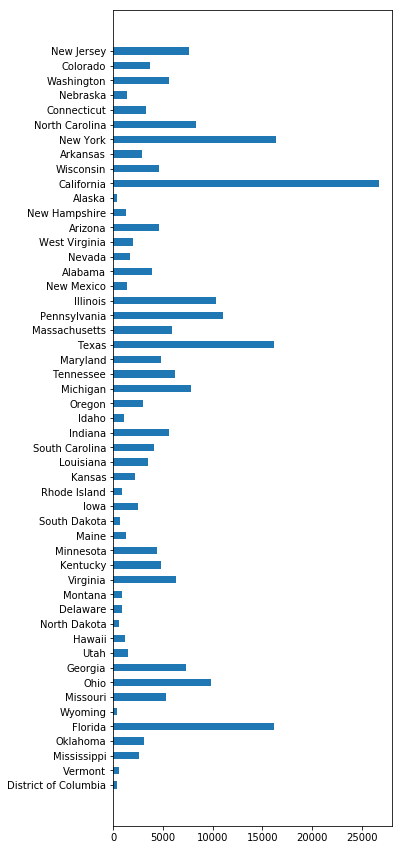

In [39]:
# Plotting a horizontal bar chart

plt.rcParams['figure.figsize'] = (5,15)
plt.barh(q5iii['State_name'],q5iii['Count'],height=0.5)
plt.show()

## ---------------------------------- PS5 END --------------------------------------------------------------

## PS-6 Does State has an influence on Cancer? If yes, which State?

In [40]:
year_death = year_death[(year_death['State']!='United States')]
year_death['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of\r\nColumbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [41]:
# Grouping by Year and State

q6 = year_death.groupby(['Year','State'])['Observed Deaths'].sum().reset_index()
q6.head()

,Year,State,Observed Deaths
0,2005,Alabama,101601.0
1,2005,Alaska,8805.0
2,2005,Arizona,93981.0
3,2005,Arkansas,64182.0
4,2005,California,530055.0


In [42]:
# Sorting the values

q6i = q6.sort_values(by='Observed Deaths',ascending=False)
q6i.head(3)

,Year,State,Observed Deaths
514,2015,California,555861.0
463,2014,California,548517.0
361,2012,California,546729.0


In [43]:
# Plotting the Dashboard

name_state = widgets.Dropdown(options = ['All'] + list(q6i['State'].unique()),
                      value = 'All',
                      description = "name_state: "
)

def f(x):
    
    if name_state.value != "All":
        df2 = q6i[q6i.State == name_state.value]
    else:
        df2 = q6i
    
    plt.rcParams['figure.figsize'] = [15,5]
    
    plt.bar(df2['Year'], df2['Observed Deaths'], width = .4)
    
    plt.xlabel("Year")
    
    plt.ylabel('No. of Death')
    
    plt.title("Year wise")
    
    plt.show()

interact(f, x = name_state)

interactive(children=(Dropdown(description='name_state: ', options=('All', 'California', 'Texas', 'Florida', '…

<function __main__.f(x)>

## --------------------------------- PS6 END -------------------------------------------------------------

## PS-7 Correlation between Poverty Levels,Insurance Levels and Cancer Incidence Levels

In [44]:
# Grouping state wise to find no of people suffering from cancer

q7i = no_cancer.groupby('State_name')['Count'].sum().reset_index()
q7i.head()

,State_name,Count
0,Alabama,25865
1,Alaska,2238
2,Arizona,30154
3,Arkansas,16260
4,California,165979


In [45]:
# Merging above df with state to get % of popution below poverty and insurance

q7ii = pd.merge(q7i,state,left_on='State_name',right_on='Name',how = 'inner')
q7ii.head()

,State_name,Count,Name,Percentage population below poverty,Percentage population insured,Population
0,Alabama,25865,Alabama,18.4,89.2,4874747
1,Alaska,2238,Alaska,10.1,84.5,739795
2,Arizona,30154,Arizona,17.7,88.1,7016270
3,Arkansas,16260,Arkansas,18.8,90.6,3004279
4,California,165979,California,15.8,91.6,39536653


In [49]:
# Calucate cancer rate on population of each state

q7iii = q7ii[['State_name','Percentage population below poverty','Percentage population insured','Count','Population']]
q7iii['Cancer_Rate'] = round((q7iii['Count']/q7iii['Population']),5)
q7iii.head()

,State_name,Percentage population below poverty,Percentage population insured,Count,Population,Cancer_Rate
0,Alabama,18.4,89.2,25865,4874747,0.00531
1,Alaska,10.1,84.5,2238,739795,0.00303
2,Arizona,17.7,88.1,30154,7016270,0.00430
3,Arkansas,18.8,90.6,16260,3004279,0.00541
4,California,15.8,91.6,165979,39536653,0.00420


In [54]:
# Setting the state_name as index

q7iv = q7iii.set_index('State_name')
q7iv = q7iv[['State_name','Percentage population below poverty','Percentage population insured','Cancer_Rate']]
q7iv.head()

,Percentage population below poverty,Percentage population insured,Cancer_Rate
State_name,,,
Alabama,18.4,89.2,0.00531
Alaska,10.1,84.5,0.00303
Arizona,17.7,88.1,0.00430
Arkansas,18.8,90.6,0.00541
California,15.8,91.6,0.00420


In [55]:
# Finding the correlation

correlat = q7iv.corr()
correlat

,Percentage population below poverty,Percentage population insured,Cancer_Rate
Percentage population below poverty,1.000000,-0.382209,0.022113
Percentage population insured,-0.382209,1.000000,0.334985
Cancer_Rate,0.022113,0.334985,1.000000


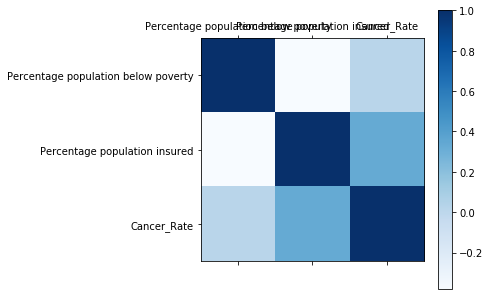

In [56]:
# Plotting the heat-map

plt.matshow(correlat, cmap = 'Blues')

plt.xticks(range(len(correlat.columns)),correlat.columns)
plt.yticks(range(len(correlat.columns)),correlat.columns)

plt.colorbar()
plt.show()

## ------------------------------------------- PS7 END -------------------------------------------------

## PS-8 Is Metropolitan City or Non-metropolitan City more affected by Cancer (based on year wise death rate).

In [57]:
# Grouping year, locality to find no of death

q8 = year_death.groupby(['Year','Locality'])['Observed Deaths'].sum().reset_index()
q8.head()

,Year,Locality,Observed Deaths
0,2005,Metropolitan,4422864.0
1,2005,Nonmetropolitan,1019703.0
2,2006,Metropolitan,4428105.0
3,2006,Nonmetropolitan,1017882.0
4,2007,Metropolitan,4426080.0


In [58]:
# Plotting the Dashboard

name_year = widgets.Dropdown(options = ['All'] + list(q8['Year'].unique()),
                      value = 'All',
                      description = "name_year: "
)

def f(x):
    
    if name_year.value != "All":
        df2 = q8[q8.Year == name_year.value]
    else:
        df2 = q8
    
    plt.rcParams['figure.figsize'] = [5,5]
    
    plt.bar(df2['Locality'], df2['Observed Deaths'], width = .4)
    
    plt.xlabel("Locality")
    
    plt.ylabel('No. of Death')
    
    plt.title("Locality wise")
    
    plt.show()

interact(f, x = name_year)

interactive(children=(Dropdown(description='name_year: ', options=('All', 2005, 2006, 2007, 2008, 2009, 2010, …

<function __main__.f(x)>

## --------------------------------------- PS8 END ----------------------------------------------------------------

# --------------------------------------- DOCUMENT END ----------------------------------------